# Osteoarthritis Assignment
An orthopaedist is a medical doctor specializing in diagnosing and treating disorders related to the skeletal system. Part of their job is to distinguish between a healthy person and a person with Osteoarthritis by looking at their knee X-ray images.

# Osteoarthritis: 
Osteoarthritis, commonly known as wear-and-tear arthritis, is a condition in which the natural cushioning between joints -- cartilage -- wears away. When this happens, the bones of the joints rub more closely against one another with less of the shock-absorbing benefits of cartilage. The rubbing results in pain, swelling, stiffness, decreased ability to move, and sometimes the formation of bone spurs.


# Objective:

You have to create a deep learning model that can detect if osteoarthritis is present or not in a given knee X-ray image using inceptionV3(GoogleNet) architecture.

## Dataset:

The Dataset contains three folders : 

Test (845 images)

Train (2350 images)

Valid (641 images)



Each of these folders has two folders  

Test
    
    - Normal
    
    - Osteoarthritis
Train
    
    -Normal
    
    -Osteoarthritis
Valid
    
    -Normal
    
    -Osteoarthritis

## Assignment

Your task is to create a deep learning model that can provide the probability of having osteoarthritis for a given knee X-ray image using inceptionV3(GoogleNet) architecture.

In [2]:
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [3]:
train_dir= r"D:\Python_coding\Internshala_projects\Osteoarthritis_Assignment_dataset\train"
validation_dir= r"D:\Python_coding\Internshala_projects\Osteoarthritis_Assignment_dataset\Valid"
test_dir= r"D:\Python_coding\Internshala_projects\Osteoarthritis_Assignment_dataset\test"

# Data Pre- Processing

 1. Read the picture files
 2. Decode the Jpeg content to RBG grids of pixel
 3. Convert these into floating point tensor.
 4. Rescale the pixel values (between 0 and 255 ) to the [0,1] interval.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

# Generating batches of tensor image data 

In [7]:
train_datagenerator = train_datagen.flow_from_directory( train_dir, target_size= (150,150), batch_size= 20, class_mode='binary')

Found 2350 images belonging to 2 classes.


In [8]:
validation_datagenerator = test_datagen.flow_from_directory( validation_dir, target_size = (150,150), batch_size= 20, class_mode='binary')

Found 641 images belonging to 2 classes.


# GoogLeNet Model

In [9]:
from tensorflow.keras.applications import InceptionV3

conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of bcbd6486424b2319ff4ef7d526e38f63 so we will re-download the data.
87910968/87910968 [==============================] - 6s 0us/step


In [10]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 256)               4718848   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 26,521,889
Trainable params: 26,487,457
Non-trainable params: 34,432
_________________________________________________________________


In [13]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

C:\Users\Akash Sahlot\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [14]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5")

In [16]:
history = model.fit_generator(
      train_datagenerator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_datagenerator,
      validation_steps=32,
      callbacks=[checkpoint_cb])

C:\Users\Akash Sahlot\AppData\Local\Temp\ipykernel_24528\3461272438.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
100/100 [==============================] - 430s 4s/step - loss: 0.5457 - acc: 0.6990 - val_loss: 0.4165 - val_acc: 0.8047
Epoch 2/10
100/100 [==============================] - 196s 2s/step - loss: 0.4170 - acc: 0.7925 - val_loss: 0.3674 - val_acc: 0.8297
Epoch 3/10
100/100 [==============================] - 141s 1s/step - loss: 0.3841 - acc: 0.8070 - val_loss: 0.4859 - val_acc: 0.8188
Epoch 4/10
100/100 [==============================] - 150s 2s/step - loss: 0.3430 - acc: 0.8447 - val_loss: 0.5095 - val_acc: 0.8141
Epoch 5/10
100/100 [==============================] - 147s 1s/step - loss: 0.3387 - acc: 0.8477 - val_loss: 0.4307 - val_acc: 0.8250
Epoch 6/10
100/100 [==============================] - 145s 1s/step - loss: 0.2928 - acc: 0.8754 - val_loss: 0.2348 - val_acc: 0.9062
Epoch 7/10
100/100 [==============================] - 150s 1s/step - loss: 0.2944 - acc: 0.8769 - val_loss: 0.1127 - val_acc: 0.9547
Epoch 8/10
100/100 [==============================] - 156s 2s/step - 

Now you can test this model on any knee x-ray image you want and find out whether the image is of a healthy person or a person with Osteoarthritis condition.

For that, you have to import the libraries given below.

In [17]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

Enter the location of the previously saved model and load it using the keras.models.load_model command.

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 256)               4718848   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 26,521,889
Trainable params: 26,487,457
Non-trainable params: 34,432
_________________________________________________________________


Enter the location of knee x - ray image that you wants to test and load the image.

Use model.predict to predict the output.

The output of this block of code will be the probability of the patient having osteoarthritis. Closer is the value to 1, higher the chances of having osteoarthritis.

In [20]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 845 images belonging to 2 classes.


In [21]:
model.evaluate_generator(test_generator, steps=42)

C:\Users\Akash Sahlot\AppData\Local\Temp\ipykernel_24528\1588263484.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, steps=42)


[7.773120880126953, 0.37857142090797424]

In [22]:
prob = model.predict(test_generator, 1)
print(prob)
if prob<=0.5:
    out = "Diseased"
    probab = 100*(1-prob)
    remedy = "Apply sulfur sprays or copper-based fungicides weekly at first sign of disease to prevent its spread."
    print(remedy)
else: 
    out = "Healthy"
    probab = 100*prob
    remedy = " "
    print(remedy)

43/43 [==============================] - 10s 205ms/step
[[1.        ]
 [0.9997373 ]
 [1.        ]
 [0.99999917]
 [0.99999005]
 [0.99990076]
 [0.49011675]
 [1.        ]
 [0.9219297 ]
 [0.9999982 ]
 [0.99795705]
 [1.        ]
 [1.        ]
 [0.9999986 ]
 [0.99944025]
 [0.9314084 ]
 [0.99983436]
 [0.9968607 ]
 [0.9986442 ]
 [1.        ]
 [0.9999998 ]
 [1.        ]
 [0.99990904]
 [0.9985035 ]
 [0.9999996 ]
 [0.9947766 ]
 [1.        ]
 [1.        ]
 [0.01677601]
 [1.        ]
 [0.99999976]
 [1.        ]
 [0.2055285 ]
 [0.9999999 ]
 [0.18037571]
 [0.9999909 ]
 [0.9990124 ]
 [0.99945086]
 [0.99999154]
 [0.9999999 ]
 [0.99999994]
 [1.        ]
 [0.9717015 ]
 [1.        ]
 [0.99999315]
 [0.8221926 ]
 [1.        ]
 [0.99982166]
 [0.99974805]
 [0.8508989 ]
 [0.99999636]
 [1.        ]
 [1.        ]
 [0.9999998 ]
 [1.        ]
 [0.99989986]
 [0.99998873]
 [1.        ]
 [0.9999852 ]
 [0.99999994]
 [0.9991422 ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.9990849 ]
 [0.9999991 ]
 [0.9999819 ]
 [0.03

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [24]:
import pandas as pd

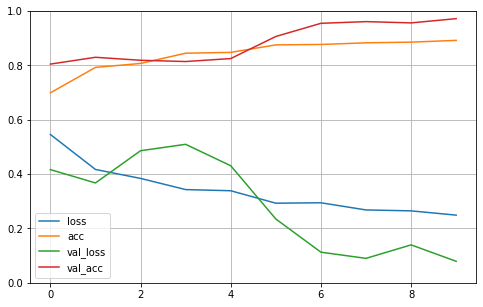

In [25]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()